In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y), 1) #we want one coloumn to reshape, because we have to display salaries 2D

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ... (your existing code) ...

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature Scaling (applied to all columns as there's only 1 feature)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)  # Apply to the entire x_train
x_test = sc.transform(x_test)  # Apply to the entire x_test

In [7]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [8]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1, 1)) # Reshape y to be a 2D array with one column

In [9]:
print (x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [11]:
#training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #using rbf kernal fro non-linear relationship for radial basis
regressor.fit(x, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [12]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1, 1)) # for scaler object, position level is 6.5 and we have to reverse transform the output Y, by this we can avoid format errpr al by reshaping

#predicting the new result

array([[170370.0204065]])

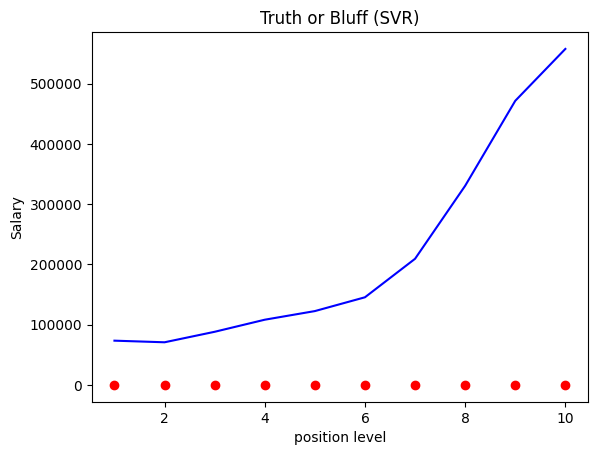

In [13]:
#visualising the SVR results
plt.scatter(sc_x.inverse_transform(x), sc_y.transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('position level')
plt.ylabel('Salary')
plt.show()

<ipython-input-14-a89731c9c9ba>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)


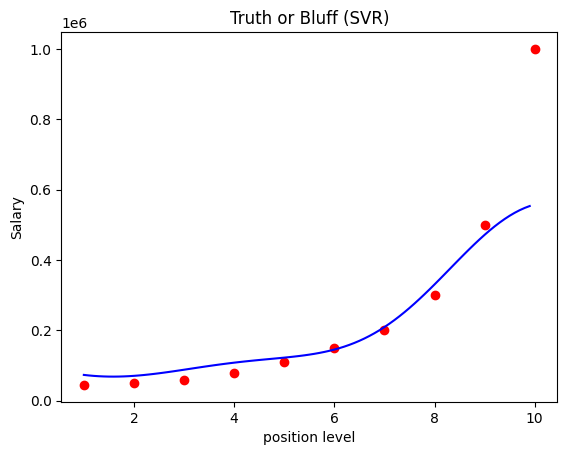

In [14]:
#visualising SVR in high resulation with smooth curve
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('position level')
plt.ylabel('Salary')
plt.show()

In [27]:
#Feature Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train) # Changed X_train to x_train
y_train = sc_y.fit_transform(y_train) # Changed y_train to y_train (although it was already y_train, ensuring consistency)

In [28]:
#Training the SVR model on the Training set
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [36]:
# ipython-input-17-551a6a535657

#Feature Scaling
from sklearn.model_selection import train_test_split # Importing train_test_split

sc_x = StandardScaler()
sc_y = StandardScaler()
# Split data into training and test sets if not already done

In [37]:
#Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1.4938211754291566